In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt

0	 [0.0621940903365612]
5	 [0.06459156423807144]
10	 [0.058073289692401886]
15	 [0.054719582200050354]
20	 [0.0545811727643013]
25	 [0.05343420058488846]
30	 [0.05309987813234329]
35	 [0.052540961652994156]
40	 [0.05193532258272171]
45	 [0.051431115716695786]
50	 [0.05081016942858696]
55	 [0.05018020421266556]
59	 [0.04965464770793915]
0	 [0.0700846016407013]
5	 [0.0770307406783104]
10	 [0.06149429827928543]
15	 [0.05566294491291046]
20	 [0.05388316884636879]
25	 [0.053156524896621704]
30	 [0.05156274139881134]
35	 [0.050725094974040985]
40	 [0.04958826303482056]
45	 [0.04883265495300293]
50	 [0.04793207719922066]
55	 [0.047094061970710754]
59	 [0.0463588647544384]
0	 [0.06183649227023125]
5	 [0.08371064066886902]
10	 [0.06019105389714241]
15	 [0.05491851642727852]
20	 [0.053919289261102676]
25	 [0.0515030175447464]
30	 [0.050927307456731796]
35	 [0.04982897266745567]
40	 [0.04885754734277725]
45	 [0.04781739413738251]
50	 [0.04663451388478279]
55	 [0.04550622031092644]
59	 [0.04452401

C:\Users\andre\Code\HealthLearning\mdiabetes-behavior-modeling\visuals.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  edgecolor="w", facecolor="w", **kw)


0	 [0.06327377259731293]
5	 [0.07337088882923126]
10	 [0.054940786212682724]
15	 [0.05442417040467262]
20	 [0.051702652126550674]
25	 [0.05076609179377556]
30	 [0.0494062639772892]
35	 [0.048072442412376404]
40	 [0.046675536781549454]
45	 [0.04532046988606453]
50	 [0.043967340141534805]
55	 [0.04265579953789711]
59	 [0.041597768664360046]
0	 [0.06393737345933914]
5	 [0.061816535890102386]
10	 [0.055152151733636856]
15	 [0.05456249415874481]
20	 [0.05311819538474083]
25	 [0.05082619562745094]
30	 [0.049834202975034714]
35	 [0.04876958206295967]
40	 [0.047738008201122284]
45	 [0.04700455442070961]
50	 [0.046462103724479675]
55	 [0.046005599200725555]
59	 [0.04565713554620743]
0	 [0.0704684630036354]
5	 [0.057598818093538284]
10	 [0.05488678440451622]
15	 [0.05366332083940506]
20	 [0.051504410803318024]
25	 [0.04957098886370659]
30	 [0.04796818271279335]
35	 [0.047139279544353485]
40	 [0.04657606780529022]
45	 [0.04592272266745567]
50	 [0.04533335939049721]
55	 [0.04489744082093239]
59	 [

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

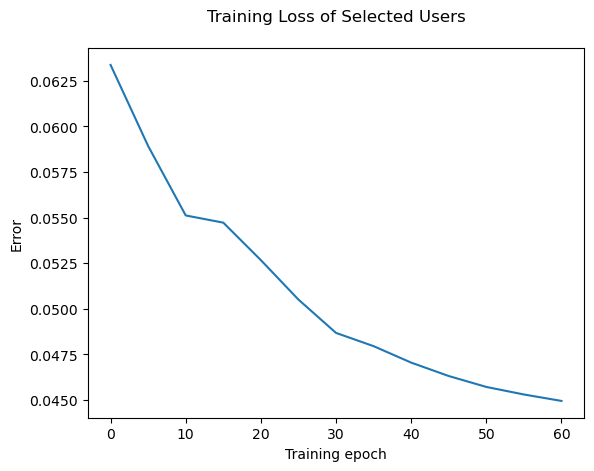

In [2]:
for respond_perc in [.5]:
# for respond_perc in [.75, .25]:
    # for estate, include_state in [(True, True)]:
    for estate, include_state, fullq in [(True, True, True), (True, False, False)]:
        for fulls, insertpreds in [(True, False), (True, True)]:
            for model, learning_rate, epochs in [("BasicNN", .0024, 60), ("LogisticRegressor", .003, 60)]:
            # for model, learning_rate, epochs in [("BasicNN", .0014, 100)]:
                # for loss_fn in ["MSELoss", "CrossEntropyLoss"]:
                for loss_fn in ["MSELoss"]:
                    test_metrics, train_metrics, adjusted_losses = [], [], []
                    for seed in range(3):
                        np.random.seed(seed)
                        torch.manual_seed(seed)
                        e = Experiment(
                            numValFolds = 5,
                            epochsToUpdateLabelMods = 10,
                            data_kw={"minw": 2,
                                    "maxw": 29,
                                    "include_state": include_state,
                                    "include_pid": False,
                                    "expanded_states": estate,
                                    "top_respond_perc": respond_perc,
                                     "full_questionnaire": fullq,
                                     "full_sequence": fulls,
                                     "insert_predictions": insertpreds
                                    },
                            model=model,
                            model_kw={
                                "lossfn": loss_fn,
                                # "lossfn": "NDCG",
                                # "lossfn": "CrossEntropyLoss",
                                "hidden_size": 200, 
                                "opt_kw": {
                                    "lr": learning_rate
                                }
                            },
                            train_kw={
                                "epochs": epochs,
                                "n_subj": 500,
                                "rec_every": 5,
                            })

                        report = e.run()



                        individual_test_scores, labels = e.report_scores_individual_test()
                        individual_train_scores, labels = e.report_scores_individual_train()



                        dire = "./experiment_output/"
                        fileprefix = f"{model}LR{learning_rate}Resp{respond_perc}States{int(include_state)}Expanded{int(estate)}Seq{int(fulls)}Pred{int(insertpreds)}"
                        np.savetxt(f"{dire}TRAINMETRICS-{fileprefix}S{seed}.csv", report["train_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                        np.savetxt(f"{dire}TESTMETRICS-{fileprefix}S{seed}.csv", report["test_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                        np.savetxt(f"{dire}IDVDTESTMETRICS-{fileprefix}S{seed}.csv", individual_test_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                        np.savetxt(f"{dire}IDVDTRAINMETRICS-{fileprefix}S{seed}.csv", individual_train_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                        np.savetxt(f"{dire}TRAINLOSSES-{fileprefix}S{seed}.csv", report["loss"], delimiter = ',')

                        preds1, preds2, preds3 = e.get_class_predictions(False)


                        np.savetxt(f"{dire}TRAINPREDS1-{fileprefix}S{seed}.csv", preds1, delimiter = ',')
                        np.savetxt(f"{dire}TRAINPREDS2-{fileprefix}S{seed}.csv", preds2, delimiter = ',')
                        np.savetxt(f"{dire}TRAINPREDS3-{fileprefix}S{seed}.csv", preds3, delimiter = ',')

                        plt.clf()
                        splot = plt.hist(preds1)
                        plt.title("Train Predictions for Class 1")
                        plt.savefig(f"{dire}/img/C1PredsTrain-{fileprefix}S{seed}.png")

                        plt.clf()
                        splot = plt.hist(preds2)
                        plt.title("Train Predictions for Class 2")
                        plt.savefig(f"{dire}/img/C2PredsTrain-{fileprefix}S{seed}.png")

                        plt.clf()
                        splot = plt.hist(preds3)
                        plt.title("Train Predictions for Class 3")
                        plt.savefig(f"{dire}/img/C3PredsTrain-{fileprefix}S{seed}.png")

                        preds1, preds2, preds3 = e.get_class_predictions(True)

                        np.savetxt(f"{dire}TESTPREDS1-{fileprefix}S{seed}.csv", preds1, delimiter = ',')
                        np.savetxt(f"{dire}TESTPREDS2-{fileprefix}S{seed}.csv", preds2, delimiter = ',')
                        np.savetxt(f"{dire}TESTPREDS3-{fileprefix}S{seed}.csv", preds3, delimiter = ',')

                        plt.clf()
                        splot = plt.hist(preds1)
                        plt.title("Test Predictions for Class 1")
                        plt.savefig(f"{dire}/img/C1PredsTest-{fileprefix}S{seed}.png")

                        plt.clf()
                        splot = plt.hist(preds2)
                        plt.title("Test Predictions for Class 2")
                        plt.savefig(f"{dire}/img/C2PredsTest-{fileprefix}S{seed}.png")

                        plt.clf()
                        splot = plt.hist(preds3)
                        plt.title("Test Predictions for Class 3")
                        plt.savefig(f"{dire}/img/C3PredsTest-{fileprefix}S{seed}.png")


                        plt.clf()
                        splot = plt.scatter(individual_test_scores[:, -1], individual_test_scores[:, labels.index("Acc")])
                        plt.title("Test Accuracy vs Response Count")
                        plt.savefig(f"{dire}/img/TestACCvResponse-{fileprefix}S{seed}.png")
                        plt.clf()
                        splot = plt.scatter(individual_train_scores[:, -1], individual_train_scores[:, labels.index("Acc")])
                        plt.title("Train Accuracy vs Response Count")
                        plt.savefig(f"{dire}/img/TrainACCvResponse-{fileprefix}S{seed}.png")
                        plt.clf()


                        writer = open(f"{dire}ALOSS-{fileprefix}.csv", "a")
                        writer.write(",".join([str(loss[0]) for loss in report["loss"]]))
                        writer.write("\n")
                        writer.close()

                        writer = open(f"{dire}FINALTRAINMETRICS-{fileprefix}.csv", "a")
                        writer.write(",".join([str(loss) for loss in report["train_metrics"][-1, :]]))
                        writer.write("\n")
                        writer.close()

                        writer = open(f"{dire}FINALTESTMETRICS-{fileprefix}.csv", "a")
                        writer.write(",".join([str(loss) for loss in report["test_metrics"][-1, :]]))
                        writer.write("\n")
                        writer.close()

                        Plotter.training_loss(report, dire)
                        
                        plt.close("all")



In [3]:
labels.index("Acc")

4